Instructions
Your task is to explore the IMDB Movie Dataset, which includes columns like Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Meta_score, Director, Stars, No_of_votes, and Gross.

Load and Inspect Data:

Use pandas to load the IMDB Movie Dataset.
Inspect the data to understand its structure and contents.
Data Preprocessing:

Handle missing values and convert data types as needed.
Rating Trends Over Years:

Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.
Genre Popularity Analysis:

Generate a Seaborn bar plot to compare the number of movies across different genres.
Director’s Impact on Ratings:

Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings.
Star Power Analysis:

Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.
Box Plot of Genres vs. Ratings:

Visualize the distribution of IMDB_Rating across different Genres using a Seaborn box plot.
Correlation Heatmap:

Create a heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/imdb_top_1000.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [10]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [11]:
import numpy as np
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce').astype('Int64')
if not df['Certificate'].mode().empty:
    certificate_mode = df['Certificate'].mode()[0]
    df['Certificate'] = df['Certificate'].fillna(certificate_mode)
meta_score_median = df['Meta_score'].median(skipna=True)
df['Meta_score'] = df['Meta_score'].fillna(meta_score_median)
df['Gross'] = pd.to_numeric(df['Gross'].str.replace(',', '', regex=True), errors='coerce')
gross_median = df['Gross'].median(skipna=True)
df['Gross'] = df['Gross'].fillna(gross_median)

In [7]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, np.where(df[column] > upper_bound, upper_bound, df[column]))
handle_outliers_iqr(df, 'No_of_Votes')
handle_outliers_iqr(df, 'Gross')
df[['No_of_Votes', 'Gross']].describe()

,No_of_Votes,Gross
count,1000.000000,1.000000e+03
mean,250834.672250,4.384535e+07
std,253676.078174,4.974165e+07
min,25088.000000,1.305000e+03
25%,55526.250000,5.012919e+06
50%,138548.500000,2.353089e+07
75%,374161.250000,6.153989e+07
max,852113.750000,1.463303e+08


In [12]:
df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    999 non-null    object 
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    Int64  
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: Int64(1), float64(3), int64(1), object(11)
memory usage: 133.7+ KB


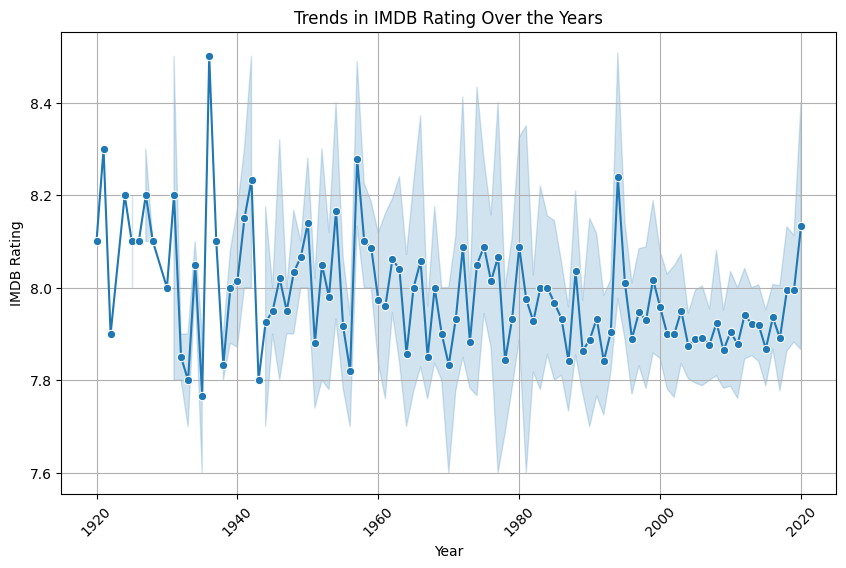

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Released_Year", y="IMDB_Rating", marker="o")
plt.title("Trends in IMDB Rating Over the Years")
plt.xlabel("Year")
plt.ylabel("IMDB Rating")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [38]:
import plotly.express as px
# too many unique values making labels unreadable, so as a way to fix this:

genre_counts = df['Genre'].value_counts()
fig = px.bar(
    x=genre_counts.index,
    y=genre_counts.values,
    labels={'x': 'Genre', 'y': 'Number of Movies'},
    title="Number of Movies Across Different Genres"
)
fig.update_layout(
    yaxis=dict(title="Number of Movies"),
    height=500,
        width=900,
        xaxis_tickangle=90,
)
fig.show()


In [34]:
fig = px.scatter(
    df,
    x="Director",
    y="IMDB_Rating",
    labels={'x': 'Director', 'y': 'IMDB Rating'},
    title="Directors and Their Impact on IMDB Ratings",
    hover_data=["Series_Title"],
)
fig.update_layout(
    xaxis=dict(
        tickangle=45,
    ),
    yaxis=dict(title="IMDB Rating"),
    height=500,
    width=1200,
)

fig.show()

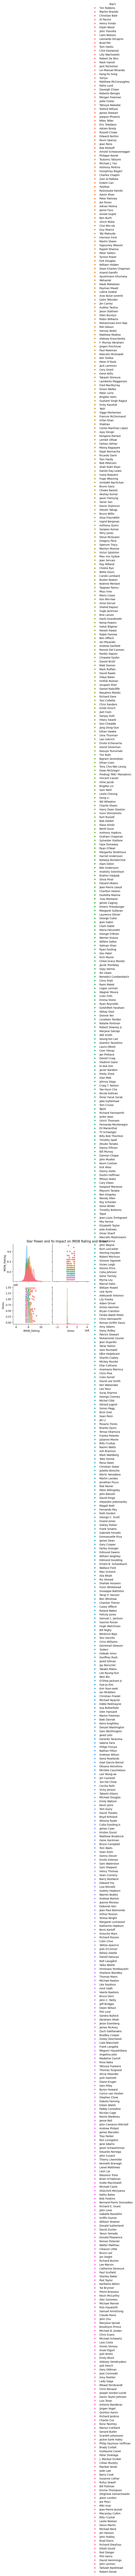

In [23]:
sns.pairplot(df, vars=["IMDB_Rating", "Gross"], hue="Star1", height=2.5)
plt.suptitle("Star Power and Its Impact on IMDB Rating and Gross", y=1.02)
plt.show()


In [29]:
fig = px.box(
    df,
    x="Genre",
    y="IMDB_Rating",
    title="Distribution of IMDB Ratings Across Genres",
    labels={"x": "Genre", "y": "IMDB Rating"},
)
fig.update_layout(
    xaxis=dict(
        tickangle=45,
    ),
    yaxis=dict(title="IMDB Rating"),
    height=500,
    width=1200,
)
fig.show()

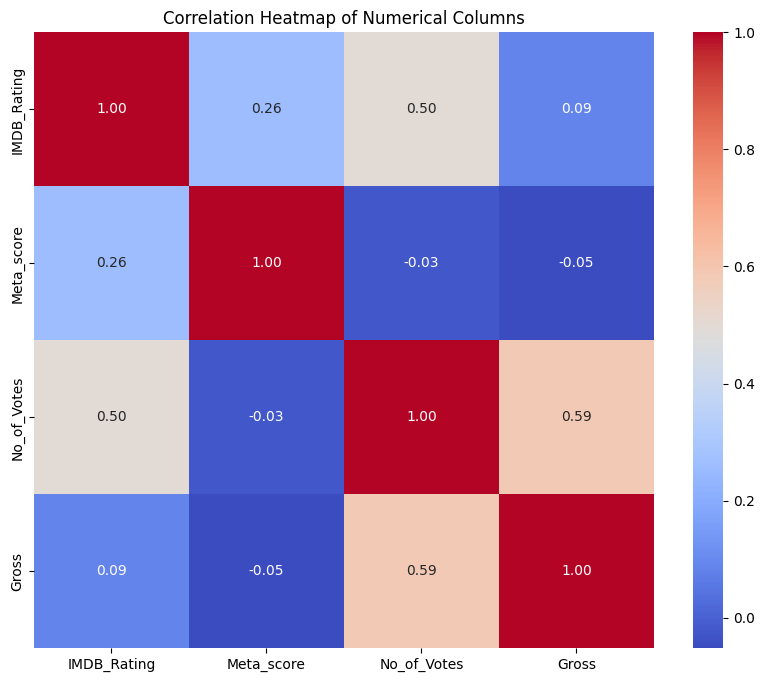

In [31]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[["IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()
